# Investigation of factors affecting average population happiness in world regions in 2017 using Gapminder world data


## Table of Contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

## Introduction

### Dataset Description 
Name: **Gapminder world**

The [Gapminder world](https://www.gapminder.org/data/) dataset spans decades and holds data regarding a number of factors that are associated with the lives of people around the world. It is noteworthy that some of the data from this source may have been updated in recent times.For the purpose of this analysis the dataset has been streamlined to data collected in 2017

### Questions for Analysis

1. Do regions with higher unemployment rates have happier populations?
2. Are regions with better educated populations happier?
3. Do happier populations have higher life expectancies?




## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

In [3]:
df_life=pd.read_csv('life_expectancy_years.csv')
df_unemployment=pd.read_csv('long_term_unemployment_rate_.csv')
df_happy=pd.read_csv('hapiscore_whr.csv')
df_country=pd.read_csv('country.csv')
df_edu=pd.read_csv('owid_education_idx.csv')

### General Properties

In [4]:
df_life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [5]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 459.4+ KB


In [6]:
df_unemployment.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.28,5.310,5.560,6.020,6.23,5.92,5.22,4.74,4.25,NaN
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.07,NaN,1.04,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.79,0.818,0.805,0.863,NaN,NaN,1.15,1.29,1.44,1.38
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.790,7.750,7.130,7.09,5.38,5.08,5.47,5.29,NaN


In [7]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  141 non-null    object 
 1   1990     10 non-null     float64
 2   1991     14 non-null     float64
 3   1992     27 non-null     float64
 4   1993     29 non-null     float64
 5   1994     30 non-null     float64
 6   1995     33 non-null     float64
 7   1996     37 non-null     float64
 8   1997     37 non-null     float64
 9   1998     39 non-null     float64
 10  1999     41 non-null     float64
 11  2000     45 non-null     float64
 12  2001     51 non-null     float64
 13  2002     51 non-null     float64
 14  2003     53 non-null     float64
 15  2004     54 non-null     float64
 16  2005     58 non-null     float64
 17  2006     67 non-null     float64
 18  2007     62 non-null     float64
 19  2008     68 non-null     float64
 20  2009     84 non-null     float64
 21  2010     83 non-

In [7]:
df_happy.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


In [8]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2005     27 non-null     float64
 2   2006     89 non-null     float64
 3   2007     101 non-null    float64
 4   2008     109 non-null    float64
 5   2009     113 non-null    float64
 6   2010     123 non-null    float64
 7   2011     145 non-null    float64
 8   2012     140 non-null    float64
 9   2013     135 non-null    float64
 10  2014     143 non-null    float64
 11  2015     141 non-null    float64
 12  2016     140 non-null    float64
 13  2017     146 non-null    float64
 14  2018     134 non-null    float64
 15  2019     151 non-null    float64
dtypes: float64(15), object(1)
memory usage: 19.8+ KB


In [9]:
df_country.head()

,*-country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,...,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AW,NaN,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,...,Afghanistan,un_least_developed,un_central_and_southern_asia,True,unhcr_asia_pacific,sa,AF,rest,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,...,Angola,un_least_developed,un_sub_saharan_africa,True,unhcr_southern_africa,ssa,AO,rest,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,...,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AI,NaN,americas,america


In [10]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   *-country               273 non-null    object 
 1   g77_and_oecd_countries  259 non-null    object 
 2   income_3groups          218 non-null    object 
 3   income_groups           218 non-null    object 
 4   is--country             273 non-null    bool   
 5   iso3166_1_alpha2        248 non-null    object 
 6   iso3166_1_alpha3        247 non-null    object 
 7   iso3166_1_numeric       247 non-null    float64
 8   iso3166_2               1 non-null      object 
 9   landlocked              255 non-null    object 
 10  latitude                241 non-null    float64
 11  longitude               241 non-null    float64
 12  main_religion_2008      216 non-null    object 
 13  name                    273 non-null    object 
 14  un_sdg_ldc              249 non-null    ob

In [13]:
df_edu.head()


,country,1870,1871,1872,1873,1874,1875,1876,1877,1878,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,...,20.0,20.7,21.3,22.0,22.7,23.3,23.3,24.0,24.0,25.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,31.3,31.3,31.3,32.0,32.7,32.7,33.3,34.0,34.0
2,Albania,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,...,61.3,62.0,62.0,62.0,64.0,64.7,64.7,64.7,66.7,66.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.3,67.3,67.3,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,64.7,66.0,66.7,68.0,68.7,70.0,70.7,72.0,72.0


In [14]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Columns: 149 entries, country to 2017
dtypes: float64(148), object(1)
memory usage: 219.3+ KB


### Data Cleaning

Note that some explanations will follow the execution of the code.

**Life Expectancy**

This ia measure of the average life expectancy in a population
- Issues:
 1. This data set spans from 1800 to 2100; which is too large. The only columns required are the columns containing the names of the countries and the data from 2017. 
 2. The column name 2017 may become problematic when attempting to merge required datasets
- Cleaning solutions
 1. Trim data set
 2. Rename column header

In [4]:
life_df=df_life.iloc[:,[0,218]]
life_df.head()

,country,2017
0,Afghanistan,62.9
1,Angola,64.2
2,Albania,78.3
3,Andorra,82.1
4,United Arab Emirates,73.5


> Here, the `.iloc()` function was used to select only the required columns from the `df_life` dataframe. This function was used to define a new dataframe `life_df`
which now only contains the columns "country" and "2017"

In [5]:
life_df.rename(columns={'2017':'Life_expectancy'},inplace=True)
life_df.head()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,country,Life_expectancy
0,Afghanistan,62.9
1,Angola,64.2
2,Albania,78.3
3,Andorra,82.1
4,United Arab Emirates,73.5


> In this cell the `.rename()` function was used to change the column name "2017" to "Life_expectancy"

*These same functions are used to carry out similar operations on the* `df_unemployment`,`df_happy`,`df_country`& `df_edu` *datasets respectively*

**Unemployment Rate**


This is a percentage representation of the long term unemployment in a country.
- Issues:
 1. This data set spans from 1990 to 2020; which is too large. The only columns required are the columns containing the names of the countries and the data from 2017. 
 2. The column name 2017 may become problematic when attempting to merge required datasets
 3. Blank cells
- Cleaning solutions
 1. Trim data set
 2. Rename column header
 3. Fill blank cells with the mean

In [6]:
unemployment_df=df_unemployment.iloc[:,[0,28]]
unemployment_df.head()

,country,2017
0,Angola,NaN
1,Albania,5.22
2,United Arab Emirates,1.07
3,Argentina,1.15
4,Armenia,5.08


In [7]:
unemployment_df.rename(columns={'2017':'Unemployment'},inplace=True)
unemployment_df.head()

,country,Unemployment
0,Angola,NaN
1,Albania,5.22
2,United Arab Emirates,1.07
3,Argentina,1.15
4,Armenia,5.08


**Happiness Score**

This is a representation of the average happiness of a population.
- Issues:
  1. This data set spans from 2005 to 2019; which is too large. The only columns required are the columns containing the names of the countries and the data from 2017.
  2. The column name 2017 may become problematic when attempting to merge required datasets
  3. Blank cells
- Cleaning solutions
  1. Trim data set
  2. Rename column header
  3. Fill blank cells with the mean

In [8]:
happy_df =df_happy.iloc[:,[0,13]]

In [9]:
happy_df.rename(columns={'2017':'Happiness_score'},inplace=True)
happy_df.head()

,country,Happiness_score
0,Afghanistan,26.6
1,Angola,NaN
2,Albania,46.4
3,United Arab Emirates,70.4
4,Argentina,60.4


**Countries**

This contains data such as name, region, main religion etc of different countries .
- Issues:
  1. This data set contains many columns that are not essential to this analysis and so, must be removed. The only columns required are the columns containing the names of the countries and the world regions.
  2. The column name world_4region can be improved on
- Cleaning solutions
  1. Trim data set
  2. Rename column header


In [10]:
country_df=df_country.iloc[:,[13,21]]
country_df.head()

,name,world_4region
0,Abkhazia,europe
1,Aruba,americas
2,Afghanistan,asia
3,Angola,africa
4,Anguilla,americas


In [11]:
country_df.rename(columns={'name':'country','world_4region':'World region'},inplace=True)
country_df.head()

,country,World region
0,Abkhazia,europe
1,Aruba,americas
2,Afghanistan,asia
3,Angola,africa
4,Anguilla,americas


**Education**

This is a representation of the average education of a population. It is measured using the [owid index](http://gapm.io/deducation_idx).
- Issues:
  1. This data set spans from 1870 to 2017; which is too large. The only columns required are the columns containing the names of the countries and the data from 2017.
  2. The column name 2017 may become problematic when attempting to merge required datasets
- Cleaning solutions
  1. Trim data set
  2. Rename column header


In [12]:
edu_df=df_edu.iloc[:,[0,148]]

In [13]:
edu_df.rename(columns={'2017':'Avg_education'},inplace=True)
edu_df.head()

,country,Avg_education
0,Afghanistan,25.3
1,Angola,34.0
2,Albania,66.7
3,Andorra,68.0
4,United Arab Emirates,72.0


**Merging Dataframes**

It would be cumbersome to work with 5 individual data sets so merging them into a single dataframe would be the best option. To do this the `.merge()` function avalable in pandas is used because all 5 datasets have a column - "country" - in common. Using this function, the dataframes will be merged on the basis of that common column. 

In [14]:
facts_df=pd.merge(pd.merge(life_df,unemployment_df,on='country'),pd.merge(happy_df,country_df,on='country'))

> The dataframes `life_df`,`unemployment_df`,`happy_df` & `country_df` were first merged into a dataframe defined as `facts_df`

In [29]:
factors_df=pd.merge(facts_df,edu_df, on ='country')

> Due to the number of dataframes, they weren't all merged at once. Here, the `facts_df` dataframe is merged with the `edu_df` dataframe to give the all encompassing dataframe named `factors_df` to represent all the factors influencing the happiness of a country.

In [16]:
factors_df.head()

,country,Life_expectancy,Unemployment,Happiness_score,World region,Avg_education
0,Angola,64.2,NaN,NaN,africa,34.0
1,Albania,78.3,5.22,46.4,europe,66.7
2,United Arab Emirates,73.5,1.07,70.4,asia,72.0
3,Argentina,76.3,1.15,60.4,americas,66.0
4,Armenia,75.5,5.08,42.9,europe,78.0


> A preview of the new `factors_df` dataframe is displayed using the `.head()` function in pandas. 

In [44]:
def fill_cols(df,col_list):
    """"fills blank cells in a column with the mean of respective columns
    @param df: factors_df
    @param col_list: A list of column names in the factors_df
    @ return:None, fills in place"""
    for col in col_list:
        mean_ =df[col].mean()
        df[col_list]=df[col_list].fillna(mean_)
   

In [45]:
col_list= ['Unemployment', 'Happiness_score']

In [46]:
fill_cols(factors_df,col_list)

In [47]:
factors_df.head()

,country,Life_expectancy,Unemployment,Happiness_score,World region,Avg_education
0,Angola,64.2,1.805567,55.402479,africa,34.0
1,Albania,78.3,5.220000,46.400000,europe,66.7
2,United Arab Emirates,73.5,1.070000,70.400000,asia,72.0
3,Argentina,76.3,1.150000,60.400000,americas,66.0
4,Armenia,75.5,5.080000,42.900000,europe,78.0


> The `.mean()` function was used to calculate the mean of the "Unemployment" and "Happiness_Score" columns. This function was defined with the name "mean_1" and "mean_2" then placed in the next line of code where the `.fillna()` function was used to fill in the mean value into the appropriate blank cells.

## Data Exploration

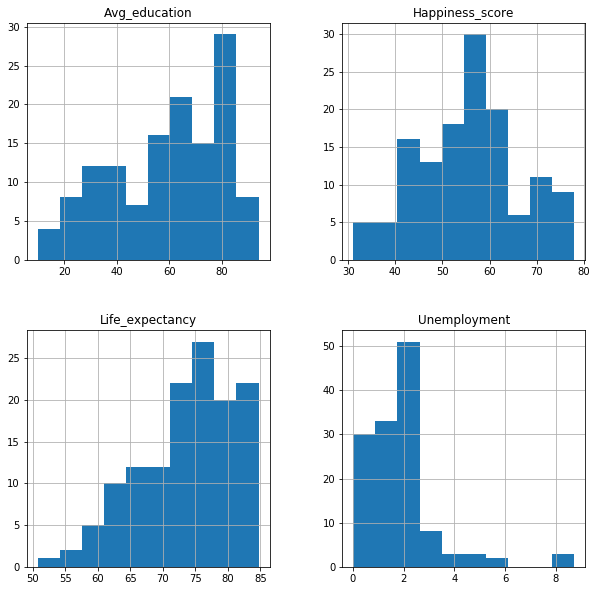

In [26]:
factors_df.hist(figsize=(10,10));

> Using the `.hist()` function in pandas, a graphical overview of the numerical data is presented. 

**Observations**

The Life expectancy & average education graphs are skewed to the right and possibly will have a positive effect on the happiness score in a country. Conversely, the unemployment graph is skewed to the left and may have a negative effect on the happiness score of a population

In [27]:
factors_df.groupby(['World region']).mean()


,Life_expectancy,Unemployment,Happiness_score,Avg_education
World region,,,,
africa,64.725714,1.963585,45.291712,36.488571
americas,76.040909,0.918870,60.932269,61.727273
asia,74.734375,1.304308,54.425310,58.477419
europe,78.720455,2.487773,61.390909,77.981818


> Using the `.groupby()` and `.mean()` functions in pandas, the mean values of the indicators in the dataset are displayed based on the region. These values are essential for the visual analysis that follows

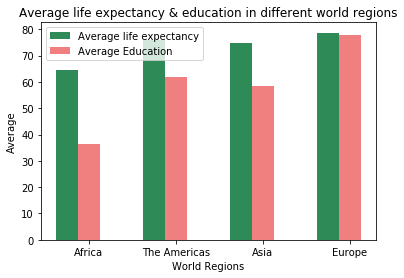

In [28]:
N = 4
ind = np.arange(N)
width = 0.25

av_life = [64.7, 76, 74.7,78.7]
bar1 = plt.bar(ind, av_life, width, color='seagreen')

av_edu = [36.5, 61.7, 58.4,78.0]
bar2 = plt.bar(ind+width, av_edu, width, color = 'lightcoral')

plt.xlabel("World Regions")
plt.ylabel('Average')
plt.title("Average life expectancy & education in different world regions")

plt.xticks(ind+width,['Africa', 'The Americas', 'Asia', 'Europe'])
plt.legend( (bar1, bar2), ( 'Average life expectancy', 'Average Education') )
plt.show()


> The `np.arange()` function in numpy is used to indicate that the bar chart that will be displayed will have 4 groups on the x-axis. 2 lists named "av_life" and "av_edu" are created to hold the values for the first and second bar in respectively.

> Using the `plt.bar` function from `matplotlib.pyplot` a bar chart was created. The axis labels were inputed using the `plt.xlabel()` and `plt.ylabel()` functions, and the title was inputed using the `plt.title()` function.

> The `plt.show()` function was used to display the bar chart which shows the average life expectancy and average education of the populations of the different world regions.

**Observations**
- Life expectancy is highest in the Americas and lowest in Africa. 
- Average eduaction is highest in Europe and lowest in Africa
- Europe has near equal average values for life expectancy and education

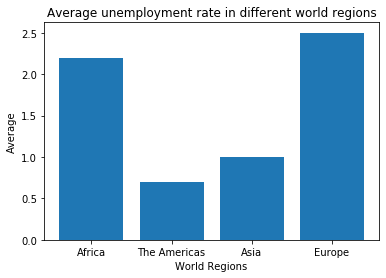

In [29]:
plt.bar([1,2,3,4],[2.2,0.7,1.0,2.5], tick_label=['Africa','The Americas','Asia','Europe'])
plt.xlabel('World Regions')
plt.ylabel('Average')
plt.title('Average unemployment rate in different world regions')
plt.show()

 > Unlike the previous visual, there is only one indicator being assessed here -unemployment rate. Because of this the bars are all of the same color. The unemployment is plotted for the different world regions
 
 **Observations**
 - Europe has the highest unemplyment rate
 - The Americas have the lowest unemployment rate

### 1. Do regions with higher unemployment rates have happier populations?

In [40]:
factors_df['Unemployment'].median()


1.29

> The high and low unemployment regions must first be classified before this question can be answered. In order to do this, the median is calculated using the `.median()` function. This determines the benchmark value for categorization.

In [54]:
High_unemployment = factors_df.query('Unemployment >= 1.29')
Low_unemployment = factors_df.query('Unemployment < 1.29')

> The classes are defined as "High_unemployment" and "Low_unemployment". The `df.query()` function is used to make the argument for both groups. High unemployment is defined as unemployment rates that are greater than or equal to the median value while the low unemployment is defined as unemployment rates that are lower than the median value.

In the following cells the mean life expectancy, unemployment, happiness score and average education in high and low unemployment regions are calculated respectively.

In [95]:
High_unemployment.mean()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Life_expectancy    76.356250
Unemployment        2.917083
Happiness_score    55.841304
Avg_education      69.577083
dtype: float64

In [96]:
Low_unemployment.mean()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Life_expectancy    76.138298
Unemployment        0.670402
Happiness_score    60.386957
Avg_education      64.871739
dtype: float64

### 2. Are regions with better educated populations happier?

In [61]:
factors_df['Avg_education'].median()


63.65

> The regions having populations with higher and lower owid indexes must first be classified before this question can be answered. In order to do this, the median is calculated using the `.median()` function.

In [62]:
High_avg_education = factors_df.query('Avg_education >= 63.65')
Low_avg_education = factors_df.query('Avg_education < 63.65')

> The classes are defined as "High_avg_education" and "Low_avg_education". The `df.query()` function is used to make the argument for both groups. High average education is defined as education averages that are greater than or equal to the median value while the low average education is defined as education averages that are lower than the median value.

In [97]:
High_avg_education.mean()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Life_expectancy    77.998485
Unemployment        2.165047
Happiness_score    61.043548
Avg_education      77.331818
dtype: float64

In [64]:
Low_avg_education.mean()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Life_expectancy    69.131818
Unemployment        1.159563
Happiness_score    49.315517
Avg_education      42.048485
dtype: float64

### 3. Do happier populations have higher life expectancies?

In [70]:
factors_df['Happiness_score'].median()

55.9

> The regions having populations with higher and lower happiness ratings must first be classified before this question can be answered. The median is calculated using the `.median()` function for this purpose.

In [74]:
High_happiness_rating= factors_df.query('Happiness_score >= 55.9')
Low_happiness_rating= factors_df.query('Happiness_score < 55.9')

> The `df.query()` function was once again used to define the areas with high happiness ratings and low happiness ratings

In [76]:
High_happiness_rating.mean()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Life_expectancy    78.424590
Unemployment        1.312982
Happiness_score    64.673770
Avg_education      72.020000
dtype: float64

In [77]:
Low_happiness_rating.mean()

C:\Users\HP\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Life_expectancy    69.293333
Unemployment        2.559270
Happiness_score    45.976667
Avg_education      49.520000
dtype: float64

## Conclusions

Three questions were posed at the beginning of this analysis:
  1.  Do regions with higher unemployment rates have happier populations?
  2. Are regions with better educated populations happier?
  3. Do happier populations have higher life expectancies?
  
  
With the help of the explorations done it is possible to give answers to these questions for the year 2017:
  1. No. Based on the analysis, world regions with unemployment rates above the median have on average, a lower happiness rating.
  2. Yes. The analysis shows that world regions with an average owid index above the median have a higher average happiness rating.
  3. Yes. Higher average life expectancies are shown for populations that received happiness ratings equal to and above the median

**Limitations**
- These results do not indicate direct correlations between these factors and the happiness ratings of a population as there are many other factors influencing the happiness score that are unaccounted for in this analysis. 
- The analysis is limited to the year 2017 so the data must be updated to improve its relevance to present day.
- From the exploratory result of the `factors_df` dataframe, the analysis also raises questions concerning other possible fators that could be affecting the happiness rating. It shows that Africa has an average happinesss rating of 44.0 while Europe has a rating of 61.3. These regions are both in the high unemployment category yet show a stark difference in the average happiness ratings. This begs the question "why?"

**The HTML file**

[ALX PROJECT 1 -NAOMI AYIBAEMI FRANK-OPIGO](file:///C:/Users/HP/Downloads/ALX%20PROJECT%201%20-NAOMI%20AYIBAEMI%20FRANK-OPIGO.html)



**References**
- [Stack Overflow](https://stackoverflow.com/questions/)
- [Geeks for geeks](https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/)
- [Statology](https://www.statology.org/pandas-merge-multiple-columns/#:~:text=How%20to%20Merge%20Pandas%20DataFrames%20on%20Multiple%20Columns,syntax%3A%20pd.merge%28df1%2C%20df2%2C%20left_on%3D%20%5B%27col1%27%2C%27col2%27%5D%2C%20right_on%20%3D%20%5B%27col1%27%2C%27col2%27%5D%29)
-[Sparkbyexamples](https://sparkbyexamples.com/pandas/pandas-merge-multiple-dataframes/#:~:text=Pandas%20%2F%20Python%20Pandas%20merge%20%28%29%20function%20is,types%20of%20join%20inner%2C%20left%2C%20right%2C%20outer%2C%20cross.)